# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

#import warnings so to ignore Python warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
df = pd.read_csv('abtest.csv')

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

### View first 5 rows of dataframe.

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


### Check shape and data types of data frame. 

In [4]:
df.shape

(100, 6)

In [5]:
df.dtypes

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

#### Observations
- The shape of the dataframe is 100 rows and 6 columns.<br>
- The data types include integers, objects, and floats.

### Change object data types to category types to save storage.

In [6]:
df["group"]=df.group.astype("category")
df["landing_page"]=df.landing_page.astype("category")
df["converted"]=df.converted.astype("category")
df["language_preferred"]=df.language_preferred.astype("category")

### Missing value check.

In [7]:
df.isnull().values.sum()

0

#### Observations:
There are no missing values in the data frame.

### Summary statistics from the data frame. 

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Observations: 
1. The range of time spent on the page varies from 0.19 to 10.71; resulting in a difference of 10.52 between max and min visitors. <br>
2. The mean time spent on the landing page is 5.3778. 
3. This sample contains data from 100 visitors to the page. 
4. Standard deviation is ~2.378

### Univariate Analysis

In [9]:
df.groupby('landing_page').mean()

,user_id,time_spent_on_the_page
landing_page,,
new,546467.5,6.2232
old,546566.5,4.5324


#### Histogram combined with a boxplot showing time spent on the page.

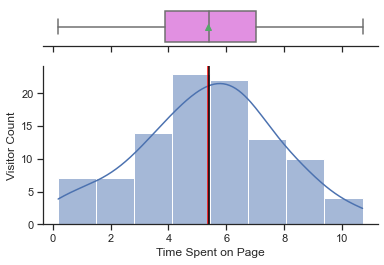

In [10]:
sns.set(style="ticks")

x = df['time_spent_on_the_page']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.25, 1)})

sns.boxplot(x, ax=ax_box, showmeans=True, color="violet").set(xlabel=None)
sns.histplot(x, ax=ax_hist, kde=True, palette = "winter")

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.axvline(x=df.time_spent_on_the_page.mean(),
            color='red')
plt.axvline(x=df.time_spent_on_the_page.median(), 
            color='black')
plt.xlabel('Time Spent on Page')
plt.ylabel('Visitor Count');

#### Observations:
The time spent on the landing page no matter new or old seems to follow a fairly normal distribution with the mean sitting just above 5. We can check the mean just to be sure. 

In [11]:
# Display the mean time spent on the page.
df['time_spent_on_the_page'].mean()

5.377800000000002

#### Count Plot displaying number of conversions on new and old landing pages.

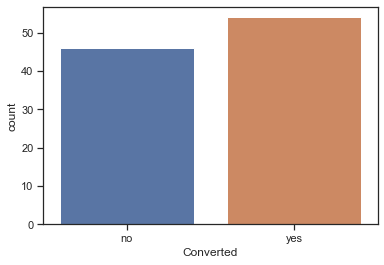

In [12]:
sns.countplot(df['converted'])
plt.xlabel('Converted');

#### Observations:
The total count of both new and old landing pages shows more visitors were converted than not.

#### Count plot displaying number of visitors to new and old page; both are set at 50.

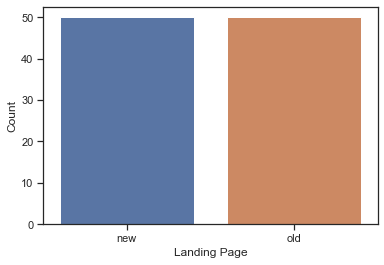

In [13]:
sns.countplot(df['landing_page'])
plt.xlabel('Landing Page')
plt.ylabel('Count');

#### Observations:
Both new and old landing pages had the same number of visitors; meaning we had two independent samples of equal size with each totaling 50.

#### Pie chart depicting preferred languages of users to the site.

In [14]:
language_sums = df.groupby('language_preferred').size()
language_sums

language_preferred
English    32
French     34
Spanish    34
dtype: int64

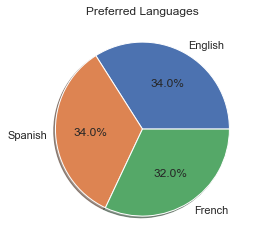

In [15]:
plt.pie (df ['language_preferred'].value_counts(),
         labels=['English','Spanish','French'], autopct='%.1f%%', shadow=True)
plt.title('Preferred Languages');

#### Observations:
Spanish and English were tied for most often preferred language on both new and old sites with French a very close 3rd\.

### Bivariate Analysis
#### Histogram displaying time spent on old and new landing pages. Mean lines added in dark orange for old and navy for new. 

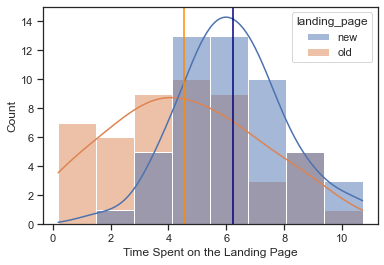

In [16]:
sns.histplot(data=df, x = df['time_spent_on_the_page'], hue='landing_page', kde=True)
plt.xlabel('Time Spent on the Landing Page')

# Plot the mean of time spent on the new landing page with a navy line.
x1 = df.groupby('landing_page').mean().iloc[0, 1]
plt.axvline(x=x1,
            color='navy')

# Plot the mean of the time spent on the old landing page with a dark orange line.
x2 = df.groupby('landing_page').mean().iloc[1, 1]
plt.axvline(x=x2, 
            color = 'darkorange');

#### Observations:
The time spent on the new landing page mean is a bit higher than the mean of the time spent on the old landing page. The new page has a more normal distribution shifted toward a longer average time spent on the landing page than that of the old. The old is more varied and shifted (skewed) more to the left of the distribution depicting less time average spent on the landing page.

#### A swarmplot showing similar data. Though it is not as helpful as the histogram. 

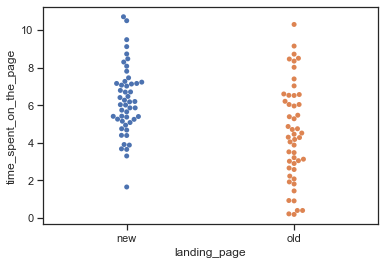

In [17]:
sns.swarmplot(data = df, x='landing_page', y ='time_spent_on_the_page');

#### Observations:
This swarmplot just gives a different visual of the time spent on both the old and new page. The time spent on the new page seems to cluster more on a longer range of time than that of the old page.

#### Box plot showing time spent on both old and new pages with the conversion shown as hue.

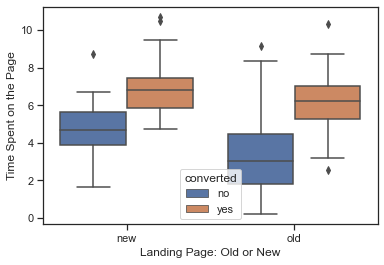

In [18]:
sns.boxplot(data = df,x='landing_page',y='time_spent_on_the_page', hue=df['converted'])
plt.xlabel('Landing Page: Old or New')
plt.ylabel('Time Spent on the Page');

### Observations:
The average time spent on the new landing page is quite a bit longer as compared to the old page and it seems a larger number of those to the new page were converted.

#### Bar plot showing time spent on each landing page and the conversion rate of each.

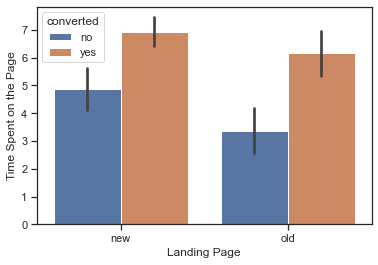

In [19]:
sns.barplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='converted')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page');

### Observations:
The barplot shows that not only are visitors spending a longer average time on the new page, more of them are being converted.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

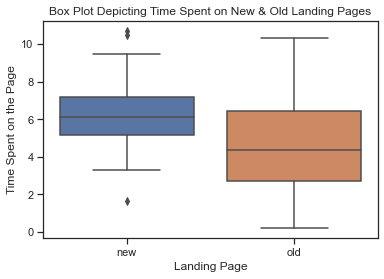

In [20]:
sns.boxplot(x=df['landing_page'], y=df['time_spent_on_the_page']); 
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page')
plt.title('Box Plot Depicting Time Spent on New & Old Landing Pages');

#### First check the standard deviation of the time spent on both the old and new pages.

In [21]:
new_std = df.groupby('landing_page').std().iloc[0, 1].round(2)
old_std = df.groupby('landing_page').std().iloc[1, 1].round(2)
print('The standard deviation of time spent on the new page is '+ str(new_std) + '.')
print('The standard deviation of time spent on the old page is '+ str(old_std) + '.')

The standard deviation of time spent on the new page is 1.82.
The standard deviation of time spent on the old page is 2.58.


#### Now determine the mean of the time spent on both the old and new page.

In [22]:
new_mean = df.groupby('landing_page').mean().iloc[0, 1].round(2)
old_mean = df.groupby('landing_page').mean().iloc[1, 1].round(2)
print('The mean of time spent on the new page is '+ str(new_mean) + '.')
print('The mean of time spent on the old page is '+ str(old_mean) + '.')

The mean of time spent on the new page is 6.22.
The mean of time spent on the old page is 4.53.


### Step 1: Define the null and alternate hypotheses

* H<sub>0</sub>: $\mu_1 = \mu_2$ (The average time spent on the old landing page and new landing page is not different.)
* H<sub>1</sub>: $\mu_1 < \mu_2$ (The average time spent on the old landing page is less than the average time spent on the new landing page.)

### Step 2: Select Appropriate test

- Though the standard deviations are known, they are not close to being equal. 
- Our data is continuous and normally distributed.
- The two samples are independent of each other. 
- A two sample z-test would be the proper test for this analysis.


### Step 3: Decide the significance level

We will test at an 0.05 significance level to determine whether or not the average time spent on the old page is  less than the time spent on the new page.

### Step 4: Collect and prepare data

In [23]:
# Locate the proper samples for the new and old landing pages. 
samp_one = df.loc[df['landing_page'] == 'new']
samp_one = samp_one['time_spent_on_the_page']

samp_two = df.loc[df['landing_page'] == 'old']
samp_two = samp_two['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [24]:
# user-defined function to compare the equality of two means from two independent populations, where population standard deviations are known
# this function returns the p-value for one tailed test
# for two-tailed test, multiply the p-value by 2
# To know more about the derivation of test statistic and standard error formula, please refer to the monographs and additional materials
def ztest_2samp(X1, X2, pop_sd1, pop_sd2, n1, n2):
    '''
    X1 - first of the two independent samples (sample 1)
    X2 - second of the two independent samples (sample 2)
    pop_sd1 - population standard deviation of sample 1
    pop_sd2 - population standard deviation of sample 2
    n1 - size of sample 1
    n2 - size of sample 2
    '''
    from numpy import sqrt, abs # import the required functions
    from scipy.stats import norm # import the required function
    se = sqrt(pop_sd1**2/n1 + pop_sd2**2/n2) # calculate the standard error
    test_stat = ((X1.mean() - X2.mean()) - 0)/ se # calculate the test statistic
    pval = 1 - norm.cdf(abs(test_stat)) # calculate the one-tailed p-value
    return pval # return the p-value

In [25]:
# find the p-value using the ztest_2samp() function
p_value = ztest_2samp(samp_one, samp_two, 1.82, 2.58, 50 ,50)
print('The P-value is', p_value)

The P-value is 7.634426865454902e-05


### Step 6: Compare the p-value with $\alpha$

This p-value of 7.634426865454902e-05 is significantly smaller than the $\alpha$ (level of significance) of 0.05.

### Step 7:  Draw inference

Since the p-value is below $\alpha$ we will reject the null hypothesis that there is no time difference between the old and new landing pages. This would likely mean that the average time spent on the new landing page is greater than the time spent on the old page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

In [26]:
df.groupby(['landing_page', 'converted']).size()

landing_page  converted
new           no           17
              yes          33
old           no           29
              yes          21
dtype: int64

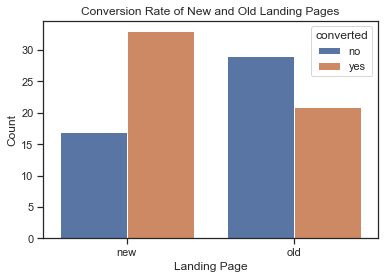

In [27]:
sns.countplot(df['landing_page'], hue=df['converted'])
plt.xlabel('Landing Page')
plt.ylabel('Count')
plt.title('Conversion Rate of New and Old Landing Pages');

#### Observations;
Conversion rate on the new page seems to be much higher than that of the old in the visual analysis.

### Step 1: Define the null and alternate hypotheses

* H<sub>0</sub>: $p_1 = p_2$ (The conversion rate for the new and old landing pages are the same.)
* H<sub>1</sub>: $p_1 > p_2$ (The conversion rate for the new page is greater than the conversion rate for the old page.)

### Step 2: Select Appropriate test

- Binomally distributed population 
- Random sampling from the population
- The two samples are independent of each other.
- Check whether np and n(1-p) are greater than or equal to 10.

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

We can use the two proportions z-test for this statistic.

### Step 3: Decide the significance level

We will test at an 0.05 significance level to determine whether the conversion rate of the old and new pages are different.

### Step 4: Collect and prepare data

In [28]:
conversion = df.groupby(['landing_page', 'converted']).size().to_frame()
conversion = conversion.reset_index()

### Step 5: Calculate the p-value

In [29]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
conversion_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conversion_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

This p-value of ~0.016 is smaller than the $\alpha$ (level of significance) of 0.05.

### Step 7:  Draw inference

Since the p-value is below $\alpha$ we will reject the null hypothesis that the conversion rate between the old and the new page are the same. 

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

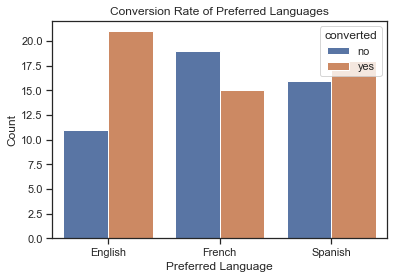

In [30]:
sns.countplot(df['language_preferred'], hue=df['converted'])
plt.xlabel('Preferred Language')
plt.ylabel('Count')
plt.title('Conversion Rate of Preferred Languages');

#### Observations: 
It is difficult to tell from the graphic if conversion is related/dependent upon preferred language.

### Step 1: Define the null and alternate hypotheses

* >$H_0:$ Conversion rate is independent of preferred language.
* >$H_a:$ Conversion rate is not independent of preferred language.

### Step 2: Select Appropriate test

- We have two categorical variables.
- There are at least 5 sample observations in each level of the variable.
- This is a random sampling from the population.
- A Chi-Square Test for Independence is appropriate here. 

### Step 3: Decide the significance level

We will test at an 0.05 significance level to determine whether or not the conversion rate is not dependent of the preferred language.

### Step 4: Collect and prepare data

In [31]:
df2 = df.copy()
conversion_lang = df2.groupby(['converted', 'language_preferred']).size().to_frame()
conversion_lang.reset_index(inplace=True)
conversion_lang.columns=['converted', 'language_preferred', 'count']
df_pivot = conversion_lang.pivot(index='converted', columns=['language_preferred'], values='count')
df_pivot

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [32]:
df3 = {'Converted': ['No', 'Yes'], 'English': [11, 21], 'French': [19, 15], 'Spanish': [16, 18]}
df3 = pd.DataFrame(df3)  
df3

,Converted,English,French,Spanish
0,No,11,19,16
1,Yes,21,15,18


### Step 5: Calculate the p-value

In [33]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(df3.drop('Converted', axis = 1))
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

This p-value of 0.21298887487543447 is greater than the $\alpha$ (level of significance) of 0.05.

### Step 7:  Draw inference

Since the p-value is above $\alpha$ we will fail to reject the null hypothesis that conversion rate is independent of preferred language. So it seems the preferred language of the visitor has no relation to whether or not they are converted; at least statistically.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

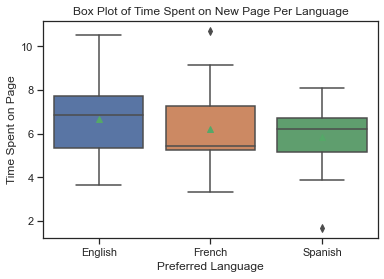

In [34]:
new_time = df.copy()
new_time = new_time[new_time['landing_page'] == 'new']
sns.boxplot(x=new_time['language_preferred'], y=new_time['time_spent_on_the_page'], showmeans=True)
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on Page')
plt.title('Box Plot of Time Spent on New Page Per Language');

In [35]:
# get the levels of factor preferred language.
new_time['language_preferred'].value_counts()

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64

#### Observations:
We have 3 levels of factors.
In this question, preferred language is the factor and time spent on the page is the response.

### Step 1: Define the null and alternate hypotheses

- >$H_0: \mu_1 = \mu_2 = \mu_3$ (All preferred languages spend the same average time on the new page.)
- >$H_a: $ At least one preferred language's average time spent on the new page is different from the rest.

### Step 2: Select Appropriate test

- Populations are normally distributed.
- Samples are independent simple random samples.
- Population variances are equal. 
- A One-Way ANOVA test would be appropriate here.

### Step 3: Decide the significance level

We will test at an 0.05 significance level to determine whether or not the average time spent on new page is the same for all language users.

### Step 4: Collect and prepare data

We previously collected the data from the new page into a dataframe during our visual analysis. 

In [36]:
new_time.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


#### Shapiro-Wilkes test must be completed to test for normality.

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [37]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_time['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

#### For equality of variance, Levene test is applied to the response variable.

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [38]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( new_time['time_spent_on_the_page'][new_time['language_preferred'] == "English"], 
                                   new_time['time_spent_on_the_page'][new_time['language_preferred']=="Spanish"], 
                                   new_time['time_spent_on_the_page'][new_time['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

- The populations are normally distributed - verified using the Shapiro-Wilk’s test.
- Samples are independent simple random samples.
- Population variances are equal - verified using the Levene's test.

#### We can use the One-Way ANOVA test to check for equality of means.

### Step 5: Calculate the p-value

In [39]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_time.loc[new_time['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              new_time.loc[new_time['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              new_time.loc[new_time['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

This p-value of ~0.43 is larger than the $\alpha$ (level of significance) of 0.05.

### Step 7:  Draw inference

Since the p-value is above $\alpha$ we fail to reject the null hypothesis. We do not have enough statistical significance to conclude that  at least one time spent on the page level is different from the rest at 5% significance level.

## Conclusion and Business Recommendations

* If the news portal completed its A/B testing of the new and old landing pages at the end of this analysis, they would need to make the change to the new landing page.
* Not only do visitors spend a greater average time on the new page (~6.22 on the new page compared to ~4.53 on the old landing page), there is a higher conversion rate for the new page (66% converted on the new page as compared to 42% for the old page).
* Even these basic statistics regarding mean and conversion support a change to the new page.
* Increased time spent on the landing page increases exposure to the brand even if the conversion does not occur. This increases market penetration through word of mouth and brand recognition.
* There is significant statistical evidence that shows the new page to be more apt to convert visitors than the old.
* The company should not be concerned with preferred language of the new page as it seems to have little bearing on average time spent on the page; however, there is visual evidence that shows a higher conversion rate may exist within English users and greater statistical exploration should be completed within the realm of preferred language and conversion on the new landing page once more data is gathered from its use.